In [1]:
#LaTeX documenation http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#Data downloaded from www.statvision.com -> orginal data comes from http://gsociology.icaap.org/dataupload.html
countries_df= pd.read_excel('countries_of_the_world.xls', header=3, skiprows=[4])

In [4]:
countries_df.head(5)

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


The arithmetic mean (or simply "mean") of a sample $x_1+x_2+...+x_n$,  usually denoted by $\bar x$, is the sum of the sampled values divided by the number of items in the example [(wikipedia)](https://en.wikipedia.org/wiki/Mean).

$$\bar x = \frac{1}{n} \sum_{i=1}^{n}x_i = \frac{x_1+x_2+...+x_n}{n}$$

Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values, with using [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method.

In [5]:
countries_df[['Birthrate']].dropna().describe()

,Birthrate
count,224.000000
mean,22.114732
std,11.176716
min,7.290000
25%,12.672500
50%,18.790000
75%,29.820000
max,50.730000


Average value calculation with pandas [mean](https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.DataFrame.mean.html) method 

In [6]:
countries_df['Birthrate'].mean()

22.114732142857147

Average value calculation with numpy [mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html) method 

In [7]:
np.mean(countries_df['Birthrate'])

22.114732142857147

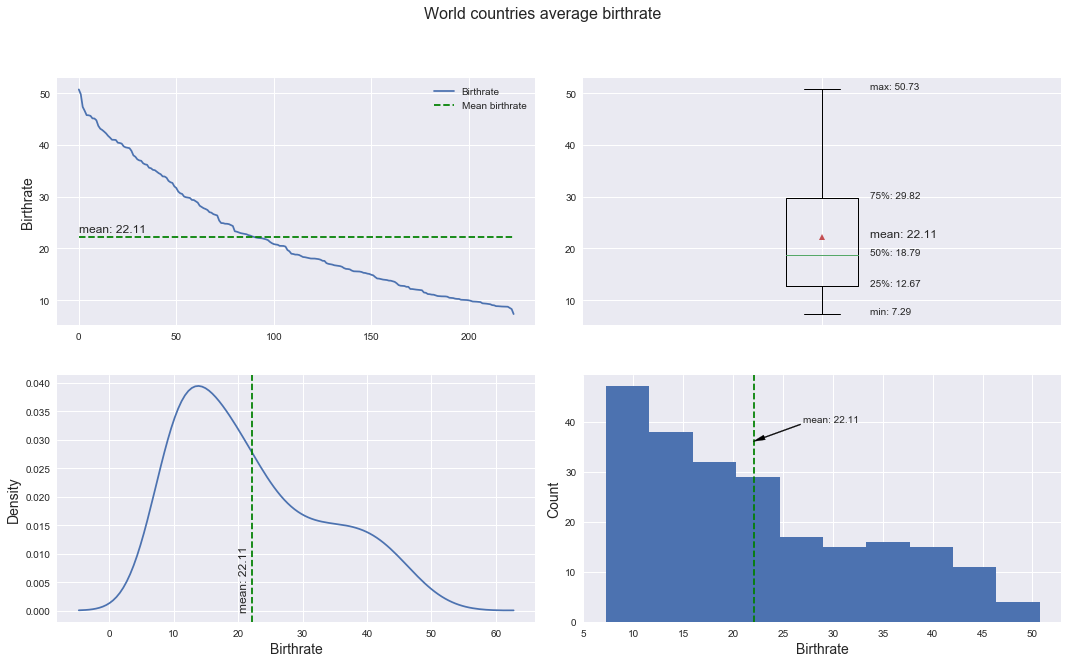

In [64]:
# Calculate the simple average of the data
mean = [countries_df['Birthrate'].dropna().mean() for i in countries_df['Birthrate'].dropna()]

#Create a figure and one subplot
fig, ax =plt.subplots(2,2, figsize=(18,10))
fig.subplots_adjust(wspace=0.1)                     

plt.suptitle('World countries average birthrate', fontsize=16)

#Subplot 1

ax[0,0].plot(countries_df['Birthrate'].dropna().sort_values(ascending=False).reset_index(drop=True))
ax[0,0].plot(mean, label='Mean birthrate', linestyle='--',color='g')
ax[0,0].set_ylabel('Birthrate', fontsize=14)
ax[0,0].text(0,mean[0]+1, 'mean: '+ str(round(mean[0],2)), fontsize=12)
ax[0,0].legend(loc='upper right')


#Subplot 2

ax[0,1].boxplot(countries_df['Birthrate'].dropna(), showmeans=True)
ax[0,1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Set text
for index, values in countries_df[['Birthrate']].dropna().describe()[3:].iterrows():            
    ax[0,1].text(1.1,values, index +': '+ str(round(values[0],2)), fontsize=10)

ax[0,1].text(1.1,mean[0], 'mean: '+ str(round(mean[0],2)), fontsize=12)

#Subplot 3
sns.distplot(countries_df['Birthrate'].dropna(), hist = False, kde =True, ax=ax[1,0])
ax[1,0].axvline(x=mean[0], color='g', linestyle='--')
ax[1,0].text(mean[0]-2,0.01, 'mean: '+ str(round(mean[0],2)), fontsize=12, rotation=90)
ax[1,0].set_ylabel('Density', fontsize=14)
ax[1,0].set_xlabel('Birthrate', fontsize=14)

#Subplot 4
ax[1,1].hist (countries_df['Birthrate'].dropna())
ax[1,1].axvline(x=mean[0], color='g', linestyle='--')
ax[1,1].set_xticks(np.arange(5,55, 5))
ax[1,1].set_xlabel('Birthrate', fontsize=14)
ax[1,1].set_ylabel('Count', fontsize=14)
ax[1,1].annotate('mean: '+ str(round(mean[0],2)), xy=(22,36), xytext=(27, 40),
            arrowprops=dict(facecolor='black', shrink=0.005, width =1, headwidth=5),
            );